# Julia set

In [1]:
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt
from IPython.display import Image

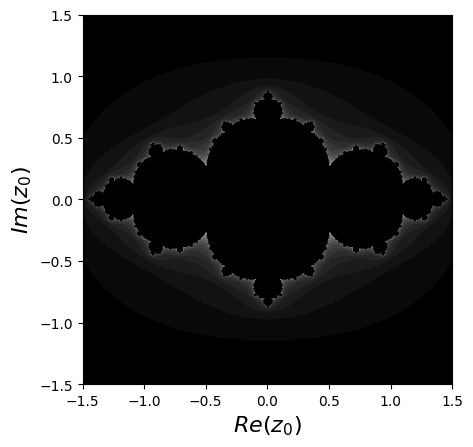

In [2]:
def my_julia(max_scale, resolution, max_iter, c):
    """
    return matrix iter)til_convergence
    """
    x, y = np.meshgrid(
        np.linspace(-max_scale, max_scale, resolution),  # float by default
        np.linspace(-max_scale, max_scale, resolution),  # float by default
    )
    z_arr = x + y * 1j

    old_shape = z_arr.shape

    iter_til_conv = np.zeros_like(z_arr, dtype=np.int16)
    is_converging = np.ones_like(z_arr, dtype=bool)

    ### make evolution of those who is_converging and update counter
    for i in range(max_iter):
        z_arr[is_converging] = z_arr[is_converging] ** 2 + c
        is_diverged_now = (z_arr * np.conj(z_arr) > 4) & (is_converging)
        iter_til_conv[is_diverged_now] = i
        is_converging = is_converging & ~(is_diverged_now)

    return iter_til_conv.reshape(old_shape)


def plot_julia_img(ax, iter_til_conv, max_scale):
    ax.imshow(
        iter_til_conv,
        cmap="gray",
        extent=[-max_scale, max_scale, -max_scale, max_scale],
    )
    ax.set_ylabel("$Im(z_0)$", fontsize=16)
    ax.set_xlabel("$Re(z_0)$", fontsize=16)


max_scale = 1.5
iter_til_conv = my_julia(max_scale, 500, 255, c=1 - 1.68)

fig, ax = plt.subplots(1, 1)
plot_julia_img(ax, iter_til_conv, max_scale)

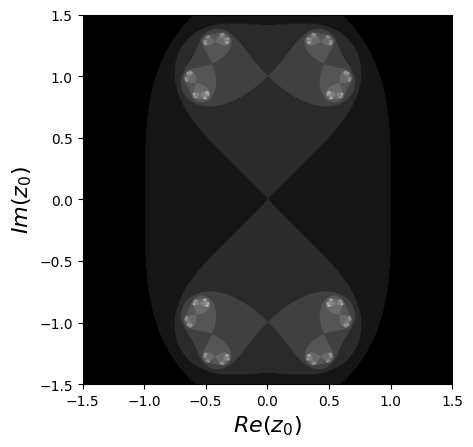

In [3]:
fig, ax = plt.subplots(1, 1)

a = np.linspace(0, 2 * np.pi, 20) # float by default


def AnimationFunction(frame):
    c = np.exp(1j * a[frame])
    plot_julia_img(ax, my_julia(max_scale, 500, 255, c=c), max_scale)


anim_created = FuncAnimation(fig, AnimationFunction, frames=a.shape[0], interval=1)
anim_created.save("HW1task2.gif", dpi=150, writer=PillowWriter(fps=5))

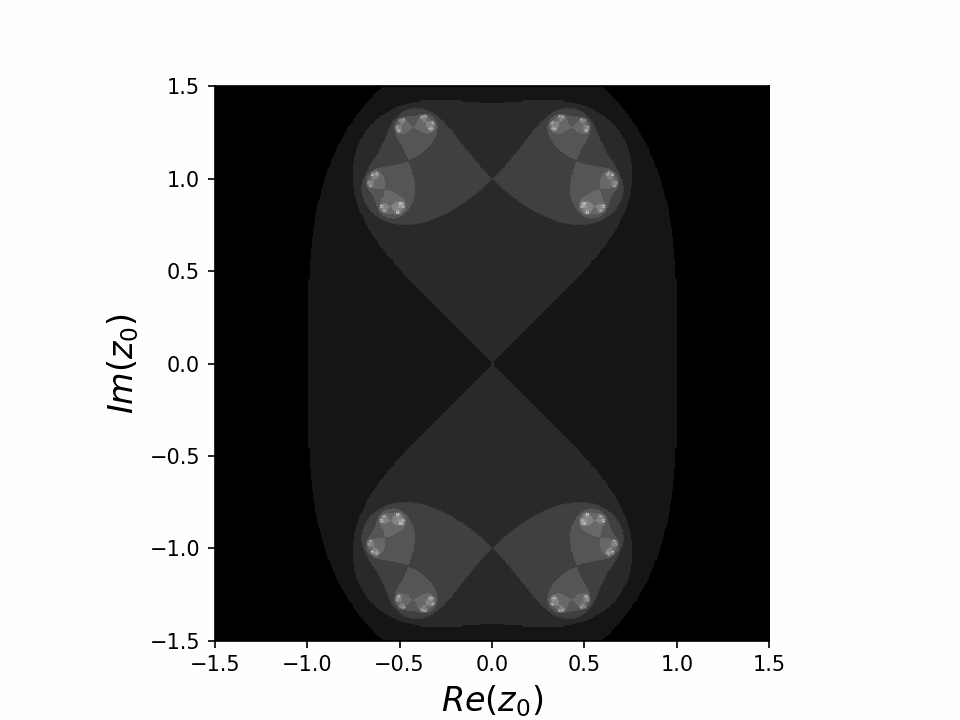

In [4]:
Image("HW1task2.gif")